# Определение успешности продаж игр

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy import stats as st
import math 
import plotly.express 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

In [40]:
games = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/games.csv')

games.info()
display(games.head(20))
display(games.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Краткие выводы по предварительному анализу:  
В таблице всего 16715 строчек, есть пропуски в столбцах "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score" и "Rating". В столбцах "Name", "Genre" всего по 2 пропуска - скорее всего, это одни и те же строчки. Больше всего пропусков в столбцах "Critic_Score", "User_Score", "Rating" - удалить просто так не получится. Заменим пропуски на нули. 
Также требуется заменить тип данных: "Year_of_Release" - года не бывают дробными,так как нам не потребуется формат времени, переведем его в int,  "User_score" - там дробные значения, а не строчные. 

# Подготавливаем данные

In [41]:
games.columns = games.columns.str.lower()

display(games.head())
#все работает

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### пропуски

In [42]:
games = games.dropna(subset=['name','genre'])
#удалили 2 строки с пропущенными значениями

#вынес в отдельную ячейку, чтобы не вылетала ошибка при повторном запуске ячейки (так
#как столбец будет уже удален)

In [43]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)

display(games['user_score'].value_counts())
display(games['critic_score'].value_counts())
display(games['user_score'].value_counts())

print(len(games[games.duplicated()]))


0      6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.2       2
0.6       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

0.0     8576
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
13.0       1
17.0       1
22.0       1
21.0       1
Name: critic_score, Length: 83, dtype: int64

0      6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.2       2
0.6       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

0


Обнаружена часто встречающаяся строка "tbd" - скорее всего, сокращение от "To Be Defined"

Заменим ее на ноль, а после, если потребуется - придумаем, что с ней делать. 

Дубликаты не обнаружены

In [44]:
games[games['user_score']=='tbd'] = games[games['user_score']=='tbd'].replace('tbd',0)
display(games['user_score'].value_counts())
#проверили, все работает

0      9123
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
9.6       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [45]:
games["rating"] = games['rating'].fillna(0)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Убрали пропуски

### Изменяем типы данных

In [46]:
games['year_of_release'] = games['year_of_release'].astype('int')  #года не бывают дробными, а формат "datetime"
#нам при таком задании не нужен


games['user_score'] = games['user_score'].astype('float') #а вот оценки бывают
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Суммарные продажи во всех регионахэ

In [47]:
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38


# Исследовательский анализ данных

###  Сколько игр выпускалось в разные годы

In [48]:
games_perr_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
display(games_perr_year)


,name
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Нулевых значений всего 269, это менее 1% от общего количества строчек. Предлагаю их удалить. 

In [74]:
games.loc[games['year_of_release']==0,:] = np.NaN

games = games.dropna(subset=['year_of_release'])

In [50]:
games['year_of_release'] = games['year_of_release'].astype('int')
#пришлось опять поменять тип данных, так как операция .dropna() привела к форматированию столбца во 'float'

games_perr_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()


games_perr_year = games_perr_year.set_axis(['year_of_release', 'game_count'], axis='columns',inplace=False)


display(games_perr_year)

,year_of_release,game_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


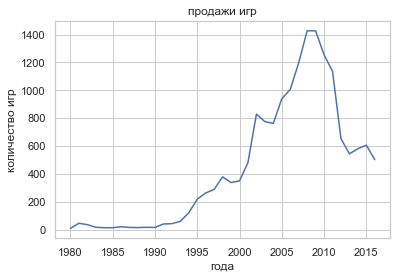

In [51]:
plt.plot(games_perr_year['year_of_release'], games_perr_year['game_count'])

plt.xlabel('года')
plt.ylabel('количество игр')
plt.title('продажи игр')
plt.show()

Исходя из данных, видно, что в целом продажи игр увеличиваются. 
С 1980 года рост, взрывной рост с 2000 года.    
Был пик в 2008, затем падение по приведенным данным, но по данным (из интернета) сейчас идет рост.
Предлагаю взять данные, начиная с 2000 года. 

### Как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [52]:
platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(platforms.head(15))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
Name: total_sales, dtype: float64

Возьмем данные по первым 6-ти платформам по прибыли. 

In [53]:
#PS2     1233.56
#X360     961.24
#PS3      931.34
#Wii      891.18
#DS       802.78
#PS       727.58

ps2=games.query('platform == "PS2" ')
display(ps2.head())
#работает

ps2=games.query('platform == "PS2" ').groupby('year_of_release')['total_sales'].sum()
ps3=games.query('platform == "PS3" ').groupby('year_of_release')['total_sales'].sum()
X360=games.query('platform == "X360" ').groupby('year_of_release')['total_sales'].sum()
Wii=games.query('platform == "Wii" ').groupby('year_of_release')['total_sales'].sum()
DS=games.query('platform == "DS" ').groupby('year_of_release')['total_sales'].sum()
PS=games.query('platform == "PS" ').groupby('year_of_release')['total_sales'].sum()

#ps2=ps2.groupby('year_of_release')['total_sales'].sum()
display(Wii.head())










,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


year_of_release
2006    137.15
2007    152.77
2008    171.32
2009    206.97
2010    127.95
Name: total_sales, dtype: float64

In [55]:
platforms = games['platform'].unique()

size = math.ceil(math.sqrt(len(platforms)))

all_sales = games.groupby(['platform','year_of_release']).agg({'total_sales' : 'sum'}).reset_index()

fig = make_subplots(
    rows=size, cols=size,
    subplot_titles=(platforms))

row = 0
col = 0

for i,p in enumerate(platforms):        
    
    if i % size == 0:
        col = 1
        row += 1
    else:
        col += 1
    data_ = all_sales[all_sales['platform'] == p]
    fig.add_trace(go.Scatter(x = data_['year_of_release'], y = data_['total_sales']),
              row=row, col=col)
    

fig.update_layout(height=1000, width=1000,
                  title_text="Распределение продаж по годам")

fig.show()

Из графика видно, что средняя продолжительность "популярности" платформы - примерно 5-7 лет

### Возьмем данные за соответствующий актуальный период.

Так как максимальное значение столбца "year_of_release" = 2016 год, предлагаю взять 5-летний срок для анализа. 
Начиная с  2012 года(и включая 2016) как раз получится 5 лет.  

In [56]:
data_for_analysis = games.query("year_of_release>=2012")
display(data_for_analysis.head())
data_for_analysis.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   float64
 9   user_score       2886 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


### Найдем платформы, которые: лидируют по продажам, растут или падают

In [57]:
top_platforms=data_for_analysis.pivot_table(index='platform', values='total_sales', aggfunc ='sum')
display(top_platforms)
display(top_platforms.sort_values(by='total_sales' , ascending=False))

,total_sales
platform,
3DS,194.61
DS,12.55
PC,62.65
PS3,288.79
PS4,314.14
PSP,11.19
PSV,49.18
Wii,35.37
WiiU,82.19


,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Больше всех зарабатывает Sony с линейкой PlayStation, PSP, PSV. Затем идет Microsoft с иксбоксами и пк, после них Nintendo с Wii и портативными консолями. 

In [58]:
PS4=data_for_analysis.query('platform == "PS4" ').groupby('year_of_release')['total_sales'].sum()
PS3=data_for_analysis.query('platform == "PS3" ').groupby('year_of_release')['total_sales'].sum()
X360=data_for_analysis.query('platform == "X360 " ').groupby('year_of_release')['total_sales'].sum()
Wii=data_for_analysis.query('platform == "Wii" ').groupby('year_of_release')['total_sales'].sum()
DS=data_for_analysis.query('platform == "DS" ').groupby('year_of_release')['total_sales'].sum()

    
    
    
ThreeDS=data_for_analysis.query('platform == "3DS" ').groupby('year_of_release')['total_sales'].sum()
XOne=data_for_analysis.query('platform == "XOne" ').groupby('year_of_release')['total_sales'].sum()
WiiU=data_for_analysis.query('platform == "WiiU " ').groupby('year_of_release')['total_sales'].sum()
PC=data_for_analysis.query('platform == "PC" ').groupby('year_of_release')['total_sales'].sum()
PSV=data_for_analysis.query('platform == "PSV" ').groupby('year_of_release')['total_sales'].sum()
PSP=data_for_analysis.query('platform == "PSP" ').groupby('year_of_release')['total_sales'].sum()






In [59]:
top_platforms = ['PS4', 'PS3', 'PC', 'XOne', 'X360', 'Wii','DS','3DS','WiiU','PSP','PSV']


# top_platforms
size = math.ceil(math.sqrt(len(top_platforms)))

all_sales = data_for_analysis.groupby(['platform','year_of_release']).agg({'total_sales' : 'sum'}).reset_index()

fig = make_subplots(
    rows=size, cols=size,
    subplot_titles=(top_platforms))

row = 0
col = 0

for i,p in enumerate(top_platforms):              
    
    if i % size == 0:
        col = 1
        row += 1
    else:
        col += 1
    data_ = all_sales[all_sales['platform'] == p]
    fig.add_trace(go.Scatter(x = data_['year_of_release'], y = data_['total_sales']),
              row=row, col=col)
    

fig.update_layout(height=1000, width=1000,
                  title_text="Распределение продаж по годам")

fig.show()





Cудя по графику, наиболее перспективные платформы - это PS4, PS3, Xbox One. Несмотря на плохие показатели, я считаю нужным включить PC (персональные компьютеры) в дальнейшее рассмотрение, так как эта платформа не может полностью исчезнуть, в отличие от других (стационарных или карманных консолей) пока существуют (и увеличиваются в количестве) персональные компьютеры вообще. 

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

<AxesSubplot:title={'center':'Разброс глобальных продаж по платформам'}, xlabel='total_sales', ylabel='platform'>

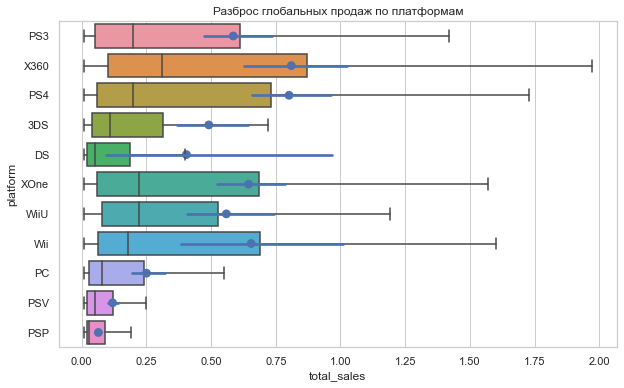

In [60]:
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.boxplot(y="platform", x="total_sales", data=data_for_analysis, showfliers=False).set(
    title='Разброс глобальных продаж по платформам')
sns.pointplot(y="platform", x="total_sales", data=data_for_analysis, join=False)


#plt.title('Разброс глобальных продаж по платформам')

#display(data_for_analysis.head())
#data_for_analysis.boxplot(column=['platform'], figsize=(10,6), grid=True)


#plt.show()





Медианы продаж держатся в районе 0,2-0,25 млн долларов. Также у каждой платформы есть "платформ-селлеры" - игры, которые принесли создателям на порядок больше денег, чем обычные, "проходные" игры, а проще говоря - выбросы. Платформы "PSV" и "PSP" принесли совсем мало, основные игроки держатся в районе 0,2-0,7 млн долларов.  

### Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.40656790206178095 Коэффициент Пирсона для игр/отзывов критиков PS4
-0.031957110204556424 Коэффициент Пирсона для игр/отзывов игроков PS4


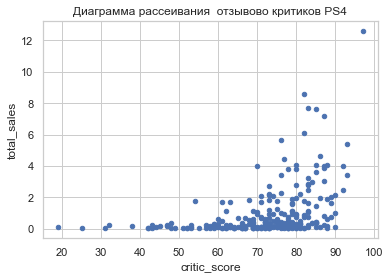

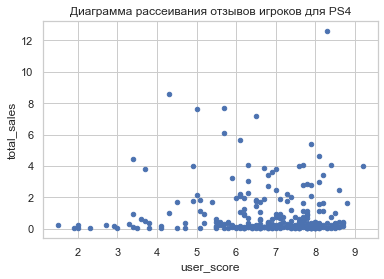

In [61]:
#PS4
PS4_scatter=data_for_analysis.query('platform == "PS4" ')
PS4_scatter.query('critic_score!=0').plot(x='critic_score', y='total_sales'
                                          , kind='scatter', title='Диаграмма рассеивания  отзывово критиков PS4')


PS4_scatter.query('user_score!=0').plot(x='user_score', y='total_sales', kind='scatter'
                                        , title='Диаграмма рассеивания отзывов игроков для PS4')

print(PS4_scatter.query('critic_score!=0')['critic_score'].corr(PS4_scatter['total_sales']), 
      "Коэффициент Пирсона для игр/отзывов критиков PS4")

print(PS4_scatter.query('user_score!=0')['user_score'].corr(PS4_scatter['total_sales']), 
      "Коэффициент Пирсона для игр/отзывов игроков PS4")





*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.3314972592629587 Коэффициент Пирсона для игр/отзывов критиков PS3
-0.005143522887113815 Коэффициент Пирсона для игр/отзывов игроков PS3


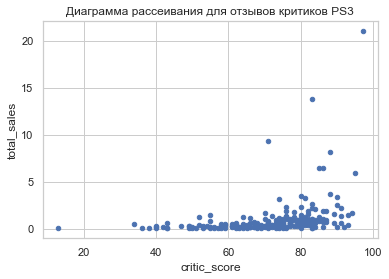

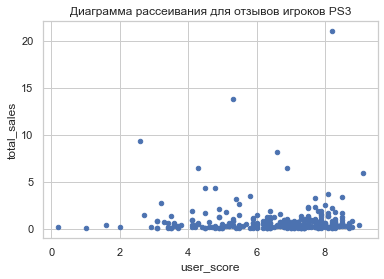

In [62]:
#PS3
PS3_scatter=data_for_analysis.query('platform == "PS3" ')
PS3_scatter.query('critic_score!=0').plot(x='critic_score', y='total_sales',
                                          kind='scatter', title='Диаграмма рассеивания для отзывов критиков PS3')


PS3_scatter.query('user_score!=0').plot(x='user_score', y='total_sales', kind='scatter'
                                        , title='Диаграмма рассеивания для отзывов игроков PS3')

print(PS3_scatter.query('critic_score!=0')['critic_score'].corr(PS3_scatter['total_sales']), 
      "Коэффициент Пирсона для игр/отзывов критиков PS3")

print(PS3_scatter.query('user_score!=0')['user_score'].corr(PS3_scatter['total_sales']), 
      "Коэффициент Пирсона для игр/отзывов игроков PS3")





*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.4169983280084017 Коэффициент Пирсона для игр/отзывов критиков XOne
-0.06892505328279414 Коэффициент Пирсона для игр/отзывов игроков XOne


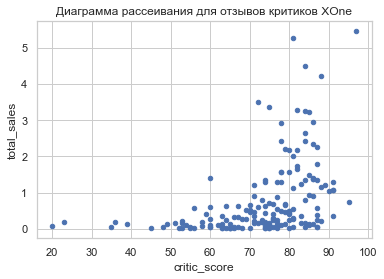

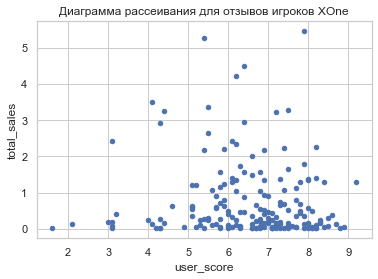

In [63]:
#XboxOne
XOne_scatter=data_for_analysis.query('platform == "XOne" ')
XOne_scatter.query('critic_score!=0').plot(x='critic_score',
                                           y='total_sales', kind='scatter', title='Диаграмма рассеивания для отзывов критиков XOne')


XOne_scatter.query('user_score!=0').plot(x='user_score',
                                         y='total_sales', kind='scatter', title='Диаграмма рассеивания для отзывов игроков XOne')

print(XOne_scatter.query('critic_score!=0')['critic_score'].corr(XOne_scatter['total_sales']), 
      "Коэффициент Пирсона для игр/отзывов критиков XOne")

print(XOne_scatter.query('user_score!=0')['user_score'].corr(XOne_scatter['total_sales']), 
      "Коэффициент Пирсона для игр/отзывов игроков XOne")





*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.23724324311567915 Коэффициент Пирсона для игр/отзывов критиков PC
-0.12186747630735577 Коэффициент Пирсона для игр/отзывов игроков PC


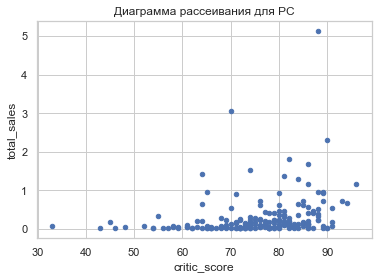

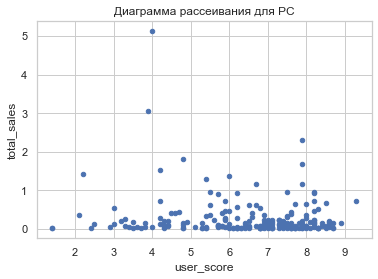

In [64]:
#PC
PC_scatter=data_for_analysis.query('platform == "PC" ')
PC_scatter.query('critic_score!=0').plot(x='critic_score', y='total_sales', kind='scatter',
                          title='Диаграмма рассеивания для PC')


PC_scatter.query('user_score!=0').plot(x='user_score', y='total_sales'
                                 , kind='scatter', title='Диаграмма рассеивания для PC')

print(PC_scatter.query('critic_score!=0')['critic_score'].corr(PC_scatter['total_sales']), 
      "Коэффициент Пирсона для игр/отзывов критиков PC")

print(PC_scatter.query('user_score!=0')['user_score'].corr(PC_scatter['total_sales']), 
      "Коэффициент Пирсона для игр/отзывов игроков PC")





Из графиков и коэффициентов корреляции Пирсона следует, что положительный отзывы критиков скорее способствуют хорошим продажам (коэффициент положительный). И как не странно, отзывы игроков находятся в обратной зависимости с продажами игр. Возможно, это объясняется тем, что некоторые игроки часто бывают разочарованы получившейся игрой. И ставят относительно низкие оценки. В то время, как критики чаще ставят схожие оценки (видно скопище точек на диаграмме рассеивания) и выбросов на диаграмме от критиков меньше. Возможно, критики - действительно точнее и хладнокровнее подходят к написанию отзывовов. Также, не считая большой корреляции у XBox One и PS4, коэффициент корреляции небольшой. Большой коэффициент у PS4 и XBox One возможно объясняется тем, что эти консоли на момент 2016 года вышли совсем недавно, и новых игр на них относительно мало, а отзывов и ажиотажа как у критиков, так и у игроков - много. 

### Соотнесите выводы с продажами игр на других платформах.

Учитывая, что PS4 и Xbox One вышли относительно недавно, в то время как PS3 и PC существует на рынке давно, наверное, можно сказать, что данные выводы: о положительной корреляции отзывов критиков и продаж и отрицательной корреляции отзывов игроков и продаж можно распространить на другие платформы: скорее всего, на низ на всех ситуация будет схожа.  

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [76]:
data_for_analysis.head()
genres_revenue = data_for_analysis.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'count', 'mean'))
display(genres_revenue.sort_values(by='sum', ascending=False))

,count,mean,sum
genre,,,
Action,1031,0.427856,441.12
Shooter,235,1.296723,304.73
Role-Playing,370,0.521081,192.80
Sports,268,0.675634,181.07
Misc,192,0.442917,85.04
Platform,85,0.717647,61.00
Racing,115,0.465217,53.50
Fighting,109,0.408165,44.49
Simulation,80,0.439000,35.12


Самые популярные (то есть больше всего игр) и больше всего заработавшие жанры - 'Action', 'Shooter', 'Role-Playing'.
Самые непопулярные и мало принесшие - 'Puzzle', 'Strategy'. Также мало принес жанр 'Adventure', хотя игр было выпущено достаточно много.
Разница между верхними и нижними значениями - в несколько порядков. Очевидно, выгоднее продавать игры в более прибыльных жанрах, чем в самым мало принесших, при условии, что у вас нет предпочтений по жанрам изначально. 

## Составим портрет пользователя каждого региона

In [66]:
# (NA, EU, JP)
#NA
display(data_for_analysis.head())
NA_platform = data_for_analysis.pivot_table(index='platform', values='na_sales', aggfunc=('sum', 'count')
                                           ).reset_index().sort_values(by='sum', ascending=False)
display(NA_platform.head())

NA_genre = data_for_analysis.pivot_table(index='genre', values='na_sales', aggfunc=('sum', 'count')
                                           ).reset_index().sort_values(by='sum', ascending=False)
display(NA_genre.head())







,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


,platform,count,sum
9,X360,292,140.05
4,PS4,392,108.74
3,PS3,493,103.38
10,XOne,247,93.12
0,3DS,396,55.31


,genre,count,sum
0,Action,1031,177.84
8,Shooter,235,144.77
10,Sports,268,81.53
7,Role-Playing,370,64.00
3,Misc,192,38.19


In [67]:
EU_platform = data_for_analysis.pivot_table(index='platform', values='eu_sales', aggfunc=('sum', 'count')
                                           ).reset_index().sort_values(by='sum', ascending=False)
display(EU_platform.head())

EU_genre = data_for_analysis.pivot_table(index='genre', values='eu_sales', aggfunc=('sum', 'count')
                                           ).reset_index().sort_values(by='sum', ascending=False)
display(EU_genre.head())





,platform,count,sum
4,PS4,392,141.09
3,PS3,493,106.86
9,X360,292,74.52
10,XOne,247,51.59
0,3DS,396,42.64


,genre,count,sum
0,Action,1031,159.34
8,Shooter,235,113.47
10,Sports,268,69.09
7,Role-Playing,370,48.53
6,Racing,115,27.29


In [68]:
JP_platform = data_for_analysis.pivot_table(index='platform', values='jp_sales', aggfunc=('sum', 'count')
                                           ).reset_index().sort_values(by='sum', ascending=False)
display(JP_platform.head())

JP_genre = data_for_analysis.pivot_table(index='genre', values='jp_sales', aggfunc=('sum', 'count')
                                           ).reset_index().sort_values(by='sum', ascending=False)
display(JP_genre.head())





,platform,count,sum
0,3DS,396,87.79
3,PS3,493,35.29
6,PSV,411,21.04
4,PS4,392,15.96
8,WiiU,147,13.01


,genre,count,sum
7,Role-Playing,370,65.44
0,Action,1031,52.80
3,Misc,192,12.86
9,Simulation,80,10.41
2,Fighting,109,9.44


Самые прибыльные жанры в Северной Америке:   
- Action 
- Shooter  
- Sports  
Также популярен жанр "Role-Playing", он 4-ый по выручке.   

самые прибыльные платформы:  
- Xbox 360 (с большим отрывом)  
- PS4 (уступает иксбоксу по выручке, но сильно опережает количеством)  
- PS3 (уступает иксбоксу по выручке, но опережает количеством)  





Самые прибыльные жанры в Европейском Союзе:  
-PS4  
-PS3(и самая популярная)  
-XBox 360   

Самые прибыльные платформы:  
- Action (и самой популярный с огромным отрывом)  
- Shooter (продаж меньше в 5 раз и на 1/4 меньше выручки)  
- Sports (более популярна, чем Shooter, но выручка меньше)  





Самые прибыльные жанры в Японии:  
- 3DS (вотчина Nintendo, с огромным отрывом от конкурентов по выручке)  
- PS3 
- PSV (по популярности почти не отличается от PS3, по выручке значительно)  

Самые прибыльные платформы:  
- Role-Playing (Больше всего по выручке)  
- Action (Незначительно отличается от Role-playing)  
- Misc (значительно уступает Action по выручке)  



Рынки Северной Америки и Европы похожи, одинаковые жанры, одинаковый выбр игровых платформ с небольшой разницей, что в Северной Америке лидирует Xbox, за которым след-в-след идет Sony с PS4 и PS3, а Европе, наоборот Xbox догоняет Sony с ее приставками. 
Рынок Японии значительно отличается: он сильно меньше по суммарной выручке, также популярны другие жанры, и "карманные", а не стационнарные консоли - 3Ds (позиции Nintendo вообще сильны), PSV. 

Для рынка Европы и Северной Америки стоит выбрать схожую стратегию с упором на стационнарные консоли, лишь по-разному выстраивать компании для продуктов Microsoft и Sony, в то время как для Японского рынка требуется совсем другая стратегия с большим упором на игры для карманных консолей и другие жанры.



### Влияет ли рейтинг ESRB на продажи в отдельном регионе - ?

In [69]:
display(data_for_analysis.head())

print(data_for_analysis['rating'].unique())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


['M' 0 'E' 'E10+' 'T']


In [70]:
#переводим рейтинг в числа для анализа

def num_rating(row):
    
    rating = row['rating']

    
    if rating == 'RP':
        return 0

    elif rating == 'EC':
        return 1

    elif rating == 'E':
        return 2

    elif rating == 'E10+':
        return 3

    elif rating == 'T':
        return 4

    elif rating == 'M':
        return 5

    elif rating == 'AO':
        return 6

data_for_analysis['num_ESRB_rating'] = data_for_analysis.apply(num_rating, axis=1)
display(data_for_analysis.head())
#работает

#print(data_for_analysis['num_ESRB_rating'].unique())
print(data_for_analysis['num_ESRB_rating'].value_counts())

#5.0    498  это рейтинг  "М"
#4.0    412  это рейтинг  "Т"
#2.0    395  это рейтинг  "Е"
#3.0    306  это рейтинг  "Е10+"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,num_ESRB_rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.0
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,5.0
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,5.0


5.0    498
4.0    412
2.0    395
3.0    306
Name: num_ESRB_rating, dtype: int64


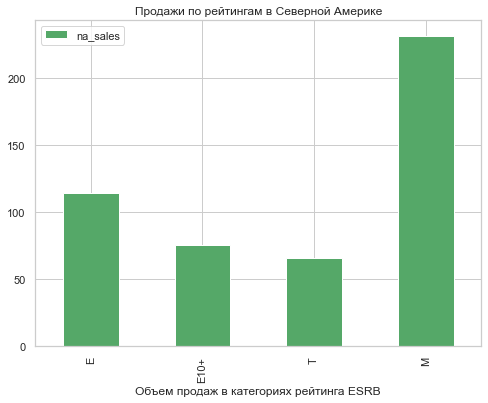

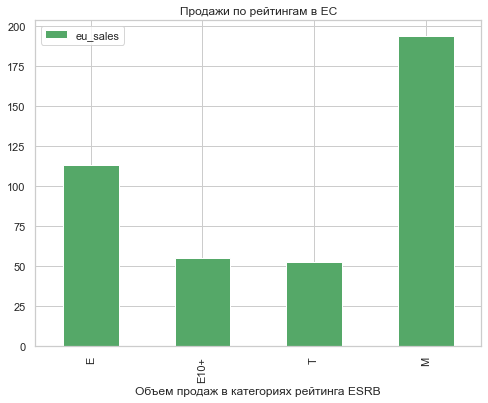

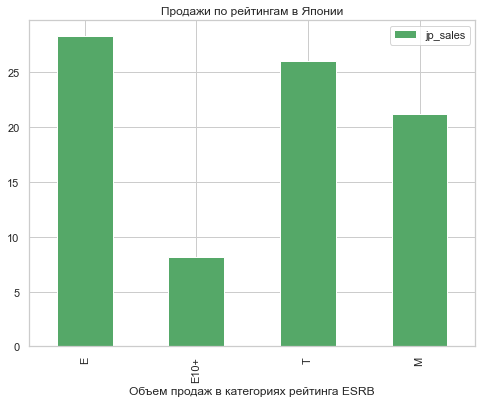

In [71]:
na = data_for_analysis.pivot_table(index='num_ESRB_rating', values='na_sales', aggfunc='sum').reset_index()
eu = data_for_analysis.pivot_table(index='num_ESRB_rating', values='eu_sales', aggfunc='sum').reset_index()
jp = data_for_analysis.pivot_table(index='num_ESRB_rating', values='jp_sales', aggfunc='sum').reset_index()

na.plot(kind='bar', figsize=(8,6), y='na_sales', color='g', title='Продажи по рейтингам в Северной Америке')
plt.xticks([0,1,2,3], ['E', 'E10+', 'T', 'M'], rotation ='vertical')
plt.xlabel('Объем продаж в категориях рейтинга ESRB')

eu.plot(kind='bar', figsize=(8,6), y='eu_sales', color='g', title='Продажи по рейтингам в ЕС')
plt.xticks([0,1,2,3], ['E', 'E10+', 'T', 'M'], rotation ='vertical')
plt.xlabel('Объем продаж в категориях рейтинга ESRB')

jp.plot(kind='bar', figsize=(8,6), y='jp_sales', color='g', title='Продажи по рейтингам в Японии')
plt.xticks([0,1,2,3], ['E', 'E10+', 'M', 'T'], rotation ='vertical')
plt.xlabel('Объем продаж в категориях рейтинга ESRB')

plt.xticks([0,1,2,3], ['E', 'E10+', 'T', 'M'], rotation ='vertical')

plt.show()

print('')




Как видно из графиков, рынки Северной Америки и Европы похожи, рынок Японии сильно отличается. В Северной Америке и Европе большим спросом пользуются игры с рейтингом "M". В Японии же наиболльшим спросом пользуются игры с рейтином "E".  

## Проверяем гипотезы

### "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Предлагаю за гипотезу H0 взять "Средние Генеральных совокупностей пользовательских рейтингов пользователей платформ Xbox One и PC равны".
За альтернативную гипотезу H1 предлагаю взять "Средние Генеральных совокупностей пользовательских рейтингов пользователей платформ Xbox One и PC не равны"

Для проверки гипотезы H0 используем stats.ttest_ind(), который вернет статистику, p-значение которой покажет, с какой вероятностью, средние этих совокупностей действительно равны. Предлагаю взять доверительный интервал alpha за 5%. 

In [72]:
display(data_for_analysis.head())

print(data_for_analysis.query('user_score != 0 & platform == "XOne" ' 
                             )['user_score'].var(), 'Дисперсия отзывов пользователей Xbox One ')
print(data_for_analysis.query('user_score != 0 & platform == "PC" ' 
                             )['user_score'].var(), 'Дисперсия отзывов пользователей PC ')
#проверяем дисперсии выборок - вдруг они совпадают. 
#не совпали

sample_XOne = data_for_analysis.query('user_score != 0 & platform == "XOne" ' 
                             )['user_score']
sample_PC = data_for_analysis.query('user_score != 0 & platform == "PC" ' 
                             )['user_score']
alpha=0.05
results = st.ttest_ind(sample_XOne, sample_PC, equal_var=False)

print('p-значение', results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем H0")
else:
    print("Не получилось отвергнуть гипотезу H0")





,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,num_ESRB_rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.0
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,5.0
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,5.0


1.9069968429360702 Дисперсия отзывов пользователей Xbox One 
2.7704439971584156 Дисперсия отзывов пользователей PC 
p-значение 0.5489537965134912
Не получилось отвергнуть гипотезу H0


P-значение получилось большим, не получилось отвергнуть гипотезу H0. Скорее всего, в большинстве случаев, средние Генеральных совокупностей пользовательских рейтингов пользователей платформ Xbox One и PC равны.

### "Средние пользовательские рейтинги жанров Action и Sports разные".

Предлагаю за гипотезу H0 взять "Средние Генеральных совокупностей пользовательских рейтингов жанров Action и Sports равны".
За альтернативную гипотезу H1 предлагаю взять "Средние Генеральных совокупностей пользовательских рейтингов жанров Action и Sports не равны"

Для проверки гипотезы H0 используем stats.ttest_ind(), который вернет статистику, p-значение которой покажет, с какой вероятностью, средние этих совокупностей действительно равны. Предлагаю взять доверительный интервал alpha за 5%. 

In [73]:
display(data_for_analysis.head())

print(data_for_analysis.query('user_score != 0 & genre == "Action" ' 
                             )['user_score'].var(), 'Дисперсия отзывов игроков жанра Action ')
print(data_for_analysis.query('user_score != 0 & genre == "Sports" ' 
                             )['user_score'].var(), 'Дисперсия отзывов игроков жанра Sports')
#проверяем дисперсии выборок - вдруг они совпадают. 
#не совпали

sample_Action = data_for_analysis.query('user_score != 0 & genre == "Action" ' 
                             )['user_score']
sample_Sports = data_for_analysis.query('user_score != 0 & genre == "Sports" ' 
                             )['user_score']
alpha=0.05
results = st.ttest_ind(sample_Action, sample_Sports, equal_var=False)

print('p-значение', results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем H0")
else:
    print("Не получилось отвергнуть гипотезу H0")






,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,num_ESRB_rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.0
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,5.0
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60,NaN
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,5.0


1.8890840494348116 Дисперсия отзывов игроков жанра Action 
3.022890298704733 Дисперсия отзывов игроков жанра Sports
p-значение 4.24307776572644e-20
Отвергаем H0


Значение p-value достаточно высокое, но недостаточно для доверительного интервала в 5%. Предлагаю отвергнуть гипотезу H0, принять гипотезу H1: "Средние Генеральных совокупностей пользовательских рейтингов жанров Action и Sports не равны".  
То есть изначально поставленная гипотеза о неравенстве (различии) средних генеральных совокупностей пользовательских рейтингов игр жанров "Sports" и "Action" верна, они, скорее всего, различаются. 

# Общий вывод

Данные были предварительно проанализированы, изменены названия столбцов, изменены типа данных на более подходящие, данные очищены от пропусков, некоторые пропущенные значенения были удалены,
некоторые (в рейтингах) ввиду невозможности заменить на медиану субъективную оценку и значение "tbd" были заменены нулями и в дальнейшем анализе исключены из рассмотрения. 

Были посчитаны суммарные продажи по регионам для каждой игры, были проанализированы игры по годам, платформам, жанрам, выбран наиболее подходящий временной период, построены соответствующие распределения, выбраны наиболее перспективные платформы, составлен портрет покупателя из рынков разных регионов, посчитана взаимосвязь между продажами игр и отзывами пользователей и критиков, также были проверены 2 гипотезы. 


Предложены особенности построения будущих рекламных компаний.